# Star Wars Survey

## Table of Contents

- [Introduction](#intro)
- [Read the dataset](#data)
- [Cleaning and Mapping Yes/No Columns](#clean)
- [Cleaning and Mapping Checkbox Columns](#checkbox)
- [Cleaning the Ranking Columns](#rank)
- [Finding the Highest-Ranked Movie](#high)
- [Finding the Most Viewed Movie](#view)
- [Exploring the Data by Binary Segments](#bin)
- [Exploring dataset by Male category ](#male)
- [Exploring dataset by Female category ](#female)
- [The Favorite Character in Star Wars](#fav)
- []()
- []()
- []()
- []()
- []()
- []()
- []()
- []()
- []()

# Introduction<a id="intro"></a>

Which is the best [Star Wars](https://en.wikipedia.org/wiki/Star_Wars) movie?

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

We will clean the data and find the relevant answers to this question in this project!

# Read the dataset <a id="data"></a>

In [150]:
# importing modules we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# we need matplotlib inlined along with codes, not in a new page
import re

In [151]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
# Reading the data into pandas dataframe
# specify this encoding because some characters aren't in Python's default utf-8 encoding.'
# read more about encoading on developer Joel Spolsky's blog
# https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [152]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [153]:
star_wars.shape

(1186, 38)

We can see that there are 1186 rows and 38 columns in the dataset.

Some columns are:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

#  Cleaning and Mapping Yes/No Columns<a id="clean"></a>

First lets look at two columns:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the [pandas.Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the [pandas.Series.map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method on series objects to perform the conversion.

In [154]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']

0       Yes
1        No
2       Yes
3       Yes
4       Yes
       ... 
1181    Yes
1182    Yes
1183     No
1184    Yes
1185    Yes
Name: Have you seen any of the 6 films in the Star Wars franchise?, Length: 1186, dtype: object

In [155]:
bool_yesno = {'Yes': True,
                    'No': False}
# mapping arguements

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_yesno)
# mapping Yes No values with boolean True and False respectively


In [156]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64

In [157]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']

0       Yes
1       NaN
2        No
3       Yes
4       Yes
       ... 
1181    Yes
1182    Yes
1183    NaN
1184    Yes
1185     No
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1186, dtype: object

In [158]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_yesno)
# mapping for boolean value

In [159]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64

`Do you consider yourself to be a fan of the Star Wars film franchise?` column has NaN values too.

# Cleaning and Mapping Checkbox Columns<a id="checkbox"></a>

The following six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [160]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts(dropna=False)

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: count, dtype: int64

In [161]:
star_wars[star_wars.columns[3]]

0       Star Wars: Episode I  The Phantom Menace
1                                            NaN
2       Star Wars: Episode I  The Phantom Menace
3       Star Wars: Episode I  The Phantom Menace
4       Star Wars: Episode I  The Phantom Menace
                          ...                   
1181    Star Wars: Episode I  The Phantom Menace
1182    Star Wars: Episode I  The Phantom Menace
1183                                         NaN
1184    Star Wars: Episode I  The Phantom Menace
1185    Star Wars: Episode I  The Phantom Menace
Name: Which of the following Star Wars films have you seen? Please select all that apply., Length: 1186, dtype: object

In [162]:
mapper = {'Star Wars: Episode I  The Phantom Menace' : True,
                      np.nan : False}

star_wars.iloc[:,3] = star_wars.iloc[:,3].map(mapper)
# mapper maps the values of rows, 

star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': "seen_1"})
# rename changes column name to seen_1
# column[3] index is for 'Which of the following Star Wars films have you seen? Please select all that apply.'

# star_wars.columns[3]
star_wars[star_wars.columns[3]].value_counts()

seen_1
True     673
False    513
Name: count, dtype: int64

There were people who didn't see `Star Wars: Episode I The Phantom Menace`.

In [163]:
star_wars['Unnamed: 4'].value_counts(dropna=False)

Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: count, dtype: int64

In [164]:
mapper_2 = {'Star Wars: Episode II  Attack of the Clones' : True, np.nan: False}

star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(mapper_2)
# mapping boolean values

star_wars = star_wars.rename(columns={'Unnamed: 4': 'seen_2'})

star_wars['seen_2'].value_counts()

seen_2
False    615
True     571
Name: count, dtype: int64

In [165]:
star_wars['Unnamed: 5'].value_counts(dropna=False)

Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: count, dtype: int64

In [166]:
mapper_3 = {'Star Wars: Episode III  Revenge of the Sith': True, np.nan: False}

star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(mapper_3)
# mapping boolean values

star_wars = star_wars.rename(columns={'Unnamed: 5': 'seen_3'})

star_wars['seen_3'].value_counts()

seen_3
False    636
True     550
Name: count, dtype: int64

In [167]:
star_wars['Unnamed: 6']

0       Star Wars: Episode IV  A New Hope
1                                     NaN
2                                     NaN
3       Star Wars: Episode IV  A New Hope
4       Star Wars: Episode IV  A New Hope
                      ...                
1181    Star Wars: Episode IV  A New Hope
1182    Star Wars: Episode IV  A New Hope
1183                                  NaN
1184    Star Wars: Episode IV  A New Hope
1185                                  NaN
Name: Unnamed: 6, Length: 1186, dtype: object

In [168]:
mapper_4 = {'Star Wars: Episode IV  A New Hope': True, np.nan: False}

star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(mapper_4)
# map boolean values

star_wars = star_wars.rename(columns={'Unnamed: 6': 'seen_4'})
# rename the column

star_wars['seen_4'].value_counts(dropna=False)

seen_4
True     607
False    579
Name: count, dtype: int64

In [169]:
star_wars['Unnamed: 7']

0       Star Wars: Episode V The Empire Strikes Back
1                                                NaN
2                                                NaN
3       Star Wars: Episode V The Empire Strikes Back
4       Star Wars: Episode V The Empire Strikes Back
                            ...                     
1181    Star Wars: Episode V The Empire Strikes Back
1182    Star Wars: Episode V The Empire Strikes Back
1183                                             NaN
1184    Star Wars: Episode V The Empire Strikes Back
1185    Star Wars: Episode V The Empire Strikes Back
Name: Unnamed: 7, Length: 1186, dtype: object

In [170]:
mapper_5 = {'Star Wars: Episode V The Empire Strikes Back': True, np.nan: False}

star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(mapper_5)
# mapping boolean values

star_wars = star_wars.rename(columns={'Unnamed: 7': 'seen_5'})
star_wars['seen_5'].value_counts()

seen_5
True     758
False    428
Name: count, dtype: int64

In [171]:
star_wars['Unnamed: 8']

0       Star Wars: Episode VI Return of the Jedi
1                                            NaN
2                                            NaN
3       Star Wars: Episode VI Return of the Jedi
4       Star Wars: Episode VI Return of the Jedi
                          ...                   
1181    Star Wars: Episode VI Return of the Jedi
1182    Star Wars: Episode VI Return of the Jedi
1183                                         NaN
1184    Star Wars: Episode VI Return of the Jedi
1185    Star Wars: Episode VI Return of the Jedi
Name: Unnamed: 8, Length: 1186, dtype: object

In [172]:
mapper_6 = {'Star Wars: Episode VI Return of the Jedi': True, np.nan: False}

star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(mapper_6)
# mapping boolean values

star_wars = star_wars.rename(columns={'Unnamed: 8': 'seen_6'})
# renaming the column

star_wars['seen_6'].value_counts()

seen_6
True     738
False    448
Name: count, dtype: int64

We now have 6 columns that represent from first to the sixth episode of the Star Wars:
- `seen_1`
- `seen_2`
- `seen_3`
- `seen_4`
- `seen_5`
- `seen_6`

These columns contains boolean values either `True` or `False`, if they have seen the movie or not.

# Cleaning the Ranking Columns<a id="rank"></a>

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [173]:
# converting these columns from 9 to 15th into float data type

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


In [174]:
# We are going to rename 6 columns from column[9] to column[14]
# we will give them names ranking_1, ranking_2 and so on. 

count = 1
# to count from 1 to 6

for col in list(star_wars[star_wars.columns[9:15]]):
    star_wars = star_wars.rename(columns={col:'ranking_'+str(count)})
#     renaming each column
    count += 1
#     count upto 6
    
star_wars[star_wars.columns[9:15]]
# print the columns

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


# Finding the Highest-Ranked Movie<a id="high"></a>

We will find the movie with highest rank with all the `ranking_n` columns. We will take the mean of the data available, and the highest mean suggest which episode has the high ratings among the 6.

In [175]:
star_wars[star_wars.columns[9:15]].mean()
# printing the mean ranks for those 6 columns

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Text(0.5, 1.0, 'Rank of Starwars movies from I to VI episodes')

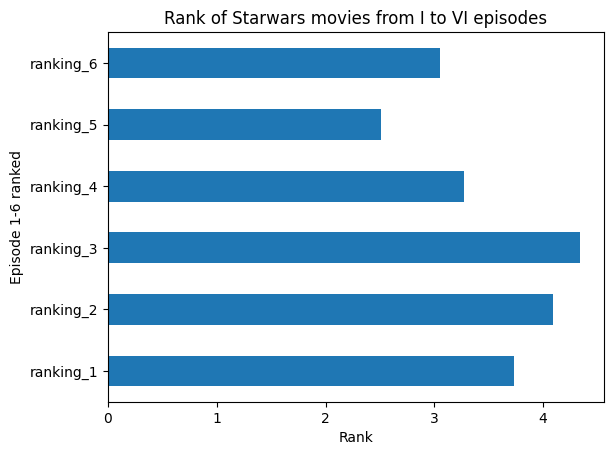

In [176]:
star_wars[star_wars.columns[9:15]].mean().plot.barh()
# bar diagram
plt.xlabel('Rank')
plt.ylabel('Episode 1-6 ranked')
plt.title('Rank of Starwars movies from I to VI episodes')

In average, the ranking_3 has the highest mean value which suggest, the `III Episode` could be the every ones preference after all! The `V Episode` is the lowest ranked!

# Finding the Most Viewed Movie<a id="view"></a>

Previously we cleaned columns like `seen_1`, `seen_2`, and so on, we will look into these columns which contain boolean values and get the sum of all the `True` values to find the most viewed `Star Wars Episode`.

In [177]:
star_wars.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


We can see `seen_n` columns are indexed from 3 to 8.

In [178]:
star_wars[star_wars.columns[3:9]].sum()
# sum of all the 6 seen episodes

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: object

Text(0, 0.5, 'Seen category')

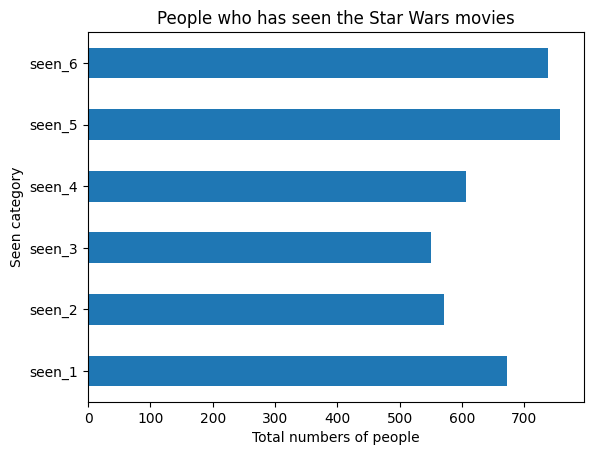

In [179]:
star_wars[star_wars.columns[3:9]].sum().plot.barh()
# bar plot for the same

plt.title("People who has seen the Star Wars movies")
plt.xlabel("Total numbers of people")
plt.ylabel("Seen category")

`V Episode` of `Star Wars` is the most seen one with total numbers of 758. The less seen was `II Episode` with 571 only who have seen the movie.

# Exploring the Data by Binary Segments<a id="bin"></a>

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` — True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?` — Yes or No
- `Gender` — Male or Female
We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the `Gender` column.

In [180]:
star_wars['Gender'].value_counts(dropna=False)

Gender
Female    549
Male      497
NaN       140
Name: count, dtype: int64

In [181]:
# splitting dataframe by gender
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']
others = star_wars[star_wars['Gender'] == np.nan]

# Exploring dataset by Male category <a id="male"></a>

In [182]:
males.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [183]:
males[males.columns[3:9]].sum()
# total seens by male population

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: object

Text(0, 0.5, 'Male seen category')

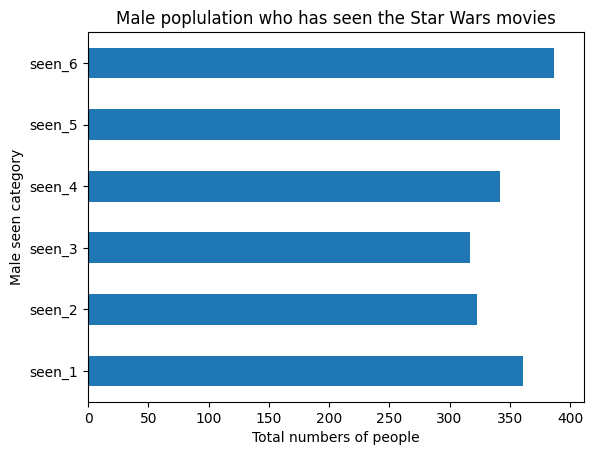

In [184]:
males[males.columns[3:9]].sum().plot.barh()
# bar plot
plt.title("Male poplulation who has seen the Star Wars movies")
plt.xlabel("Total numbers of people")
plt.ylabel("Male seen category")

In [185]:
# male mean ranking
males[males.columns[9:15]].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

Text(0, 0.5, 'Rank category for each epidoes')

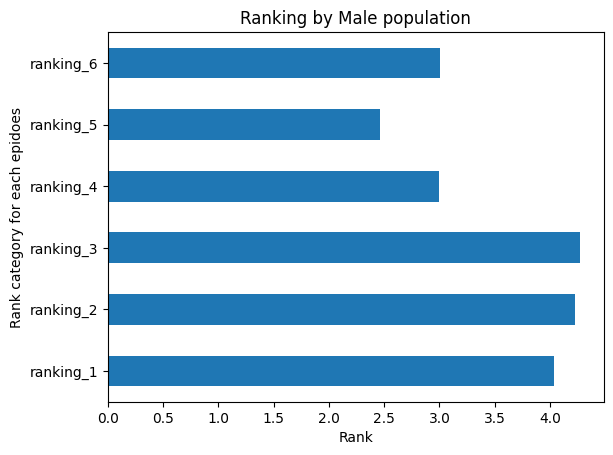

In [186]:
males[males.columns[9:15]].mean().plot.barh()
plt.title('Ranking by Male population')
plt.xlabel('Rank')
plt.ylabel('Rank category for each epidoes')

The most seen `Star Wars` movie by the male population was the `V Episode`, and the highest rank of the movie was for the `III Episode`. Yet, the `V Episode` was the lowest ranked, though.

# Exploring dataset by Female category <a id="female"></a>

In [187]:
females.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
111,3291439708,True,True,True,True,False,False,True,True,1.0,...,Somewhat favorably,Greedo,Yes,No,Yes,Female,> 60,"$50,000 - $99,999",Bachelor degree,South Atlantic
112,3291439404,True,False,True,False,False,False,False,False,1.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Female,> 60,"$25,000 - $49,999",Graduate degree,Pacific


In [188]:
females[females.columns[3:9]].sum()
# female population who saw the star wars movie by seen_n category

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: object

Text(0, 0.5, 'Female seen category')

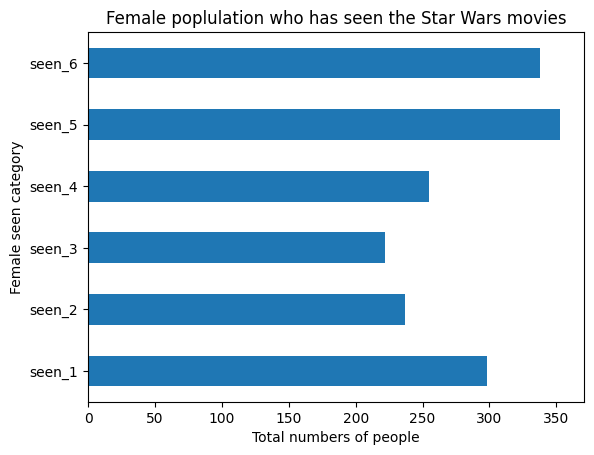

In [189]:
females[females.columns[3:9]].sum().plot.barh()
# bar plot

plt.title("Female poplulation who has seen the Star Wars movies")
plt.xlabel("Total numbers of people")
plt.ylabel("Female seen category")

In [190]:
# female ranking
females[females.columns[9:15]].mean()
# average ranking by female

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

Text(0, 0.5, 'Rank category for each epidoes')

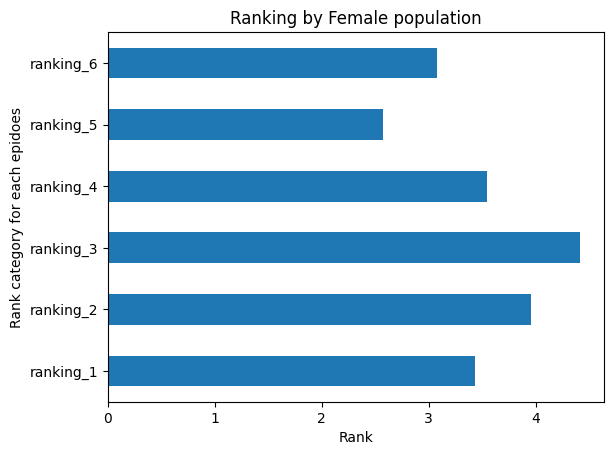

In [191]:
females[females.columns[9:15]].mean().plot.barh()
# bar plot for the same
plt.title('Ranking by Female population')
plt.xlabel('Rank')
plt.ylabel('Rank category for each epidoes')

It shows that the female population has the most seen category for `V Episode`, but, it was ranked the lowest. Yet, highly ranked `Star Wars` movie by females was the `III Episode`. This further strengthen the possibility of Gender to not effect the ranking of `Star Wars` movies.

In [192]:
# by others category
others[others.columns[3:9]].sum()

seen_1    0
seen_2    0
seen_3    0
seen_4    0
seen_5    0
seen_6    0
dtype: object

In [193]:
others[others.columns[9:15]].mean()

ranking_1   NaN
ranking_2   NaN
ranking_3   NaN
ranking_4   NaN
ranking_5   NaN
ranking_6   NaN
dtype: float64

The others category was not relevant to see any patterns in their ranking, though.

# The Favorite Character in Star Wars<a id="fav"></a>

In [194]:
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


From the 15 column to 28, the columns are unnamed, but, we know that this is a Characters favorability ratings based on the [America’s Favorite ‘Star Wars’ Movies (And Least Favorite Characters)](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) blog.
We will rename the columns as follows respectively from 15 to 28 `Unnamed_n` columns.
 
- **Luke Skywalker**
- **Han Solo**
- **Princess Leia Organa**
- **Obi Wan Kenobi**
- **Yoda**
- **R2-D2**
- **C-3P0**
- **Anakin Skywalker**
- **Darth Vader**
- **Lando Calrissian**
- **Padme Amidala**
- **Boba Fett**
- **Emperor Palpatine**
- **Jar Jar Binks**

In [195]:
map_characters = {
    star_wars.columns[15] : 'Luke Skywalker',
    star_wars.columns[16] : 'Han Solo',
    star_wars.columns[17] : 'Princess Leia Organa',
    star_wars.columns[18] : 'Obi Wan Kenobi',
    star_wars.columns[19] : 'Yoda',
    star_wars.columns[20] : 'R2-D2',
    star_wars.columns[21] : 'C-3P0',
    star_wars.columns[22] : 'Anakin Skywalker',
    star_wars.columns[23] : 'Darth Vader',
    star_wars.columns[24] : 'Lando Calrissian',
    star_wars.columns[25] : 'Padme Amidala',
    star_wars.columns[26] : 'Boba Fett',
    star_wars.columns[27] : 'Emperor Palpatine',
    star_wars.columns[28] : 'Jar Jar Binks'
                }

star_wars = star_wars.rename(columns= map_characters)
star_wars.iloc[:, 15:29].head(3)

,Luke Skywalker,Han Solo,Princess Leia Organa,Obi Wan Kenobi,Yoda,R2-D2,C-3P0,Anakin Skywalker,Darth Vader,Lando Calrissian,Padme Amidala,Boba Fett,Emperor Palpatine,Jar Jar Binks
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)


In [196]:
characters = star_wars[star_wars.columns[15:29]]

for col in characters.columns:
    print(characters[col].value_counts(normalize=True))
#     in proportionate form
    print('==='*15)

Luke Skywalker
Very favorably                                 0.735826
Somewhat favorably                             0.182147
Neither favorably nor unfavorably (neutral)    0.053076
Unfamiliar (N/A)                               0.018094
Somewhat unfavorably                           0.009650
Very unfavorably                               0.001206
Name: proportion, dtype: float64
Han Solo
Very favorably                                 0.664260
Somewhat favorably                             0.263538
Neither favorably nor unfavorably (neutral)    0.045728
Somewhat unfavorably                           0.015644
Unfamiliar (N/A)                               0.007220
Very unfavorably                               0.003610
Name: proportion, dtype: float64
Princess Leia Organa
Very favorably                                 0.658243
Somewhat favorably                             0.252708
Neither favorably nor unfavorably (neutral)    0.057762
Somewhat unfavorably                           0.

In [197]:
# the value above is copied to create a dicionary with the help of AI

data = {
    'Luke Skywalker': {
        'Very favorably': 0.735826,
        'Somewhat favorably': 0.182147,
        'Neither favorably nor unfavorably (neutral)': 0.053076,
        'Unfamiliar (N/A)': 0.018094,
        'Somewhat unfavorably': 0.009650,
        'Very unfavorably': 0.001206
    },
    'Han Solo': {
        'Very favorably': 0.664260,
        'Somewhat favorably': 0.263538,
        'Neither favorably nor unfavorably (neutral)': 0.045728,
        'Somewhat unfavorably': 0.015644,
        'Unfamiliar (N/A)': 0.007220,
        'Very unfavorably': 0.003610
    },
    'Princess Leia Organa': {
        'Very favorably': 0.658243,
        'Somewhat favorably': 0.252708,
        'Neither favorably nor unfavorably (neutral)': 0.057762,
        'Somewhat unfavorably': 0.014440,
        'Unfamiliar (N/A)': 0.009627,
        'Very unfavorably': 0.007220
    },
    'Obi Wan Kenobi': {
        'Somewhat favorably': 0.326853,
        'Very favorably': 0.297691,
        'Neither favorably nor unfavorably (neutral)': 0.164034,
        'Somewhat unfavorably': 0.100851,
        'Unfamiliar (N/A)': 0.063183,
        'Very unfavorably': 0.047388
    },
    'Yoda': {
        'Very favorably': 0.716364,
        'Somewhat favorably': 0.192727,
        'Neither favorably nor unfavorably (neutral)': 0.052121,
        'Unfamiliar (N/A)': 0.020606,
        'Somewhat unfavorably': 0.009697,
        'Very unfavorably': 0.008485
    },
    'R2-D2': {
        'Neither favorably nor unfavorably (neutral)': 0.261671,
        'Unfamiliar (N/A)': 0.191646,
        'Somewhat favorably': 0.175676,
        'Very unfavorably': 0.152334,
        'Very favorably': 0.135135,
        'Somewhat unfavorably': 0.083538
    },
    'C-3P0': {
        'Very favorably': 0.375303,
        'Somewhat favorably': 0.207022,
        'Very unfavorably': 0.180387,
        'Somewhat unfavorably': 0.123487,
        'Neither favorably nor unfavorably (neutral)': 0.101695,
        'Unfamiliar (N/A)': 0.012107
    },
    'Anakin Skywalker': {
        'Neither favorably nor unfavorably (neutral)': 0.287805,
        'Somewhat favorably': 0.271951,
        'Unfamiliar (N/A)': 0.180488,
        'Very favorably': 0.173171,
        'Somewhat unfavorably': 0.076829,
        'Very unfavorably': 0.009756
    },
    'Darth Vader': {
        'Neither favorably nor unfavorably (neutral)': 0.305419,
        'Somewhat favorably': 0.188424,
        'Very favorably': 0.169951,
        'Unfamiliar (N/A)': 0.162562,
        'Somewhat unfavorably': 0.118227,
        'Very unfavorably': 0.055419
    },
    'Lando Calrissian': {
        'Very favorably': 0.573156,
        'Somewhat favorably': 0.276904,
        'Neither favorably nor unfavorably (neutral)': 0.095526,
        'Somewhat unfavorably': 0.027811,
        'Unfamiliar (N/A)': 0.018138,
        'Very unfavorably': 0.008464
    },
    'Padme Amidala': {
        'Very favorably': 0.677108,
        'Somewhat favorably': 0.222892,
        'Neither favorably nor unfavorably (neutral)': 0.068675,
        'Unfamiliar (N/A)': 0.012048,
        'Somewhat unfavorably': 0.012048,
        'Very unfavorably': 0.007229
    },
    'Boba Fett': {
        'Very unfavorably': 0.248477,
        'Neither favorably nor unfavorably (neutral)': 0.199756,
        'Somewhat favorably': 0.158343,
        'Very favorably': 0.136419,
        'Unfamiliar (N/A)': 0.132765,
        'Somewhat unfavorably': 0.124239
    },
    'Emperor Palpatine': {
        'Neither favorably nor unfavorably (neutral)': 0.254300,
        'Somewhat favorably': 0.224816,
        'Very favorably': 0.206388,
        'Unfamiliar (N/A)': 0.201474,
        'Somewhat unfavorably': 0.071253,
        'Very unfavorably': 0.041769
    },
    'Jar Jar Binks': {
        'Very favorably': 0.732446,
        'Somewhat favorably': 0.174334,
        'Neither favorably nor unfavorably (neutral)': 0.061743,
        'Unfamiliar (N/A)': 0.012107,
        'Very unfavorably': 0.009685,
        'Somewhat unfavorably': 0.009685
    }
}

In [198]:
df_char = pd.DataFrame(data)

df_char = round(df_char*100, 1)
# converting every value into percentage form
# and round off to 1 decimal point

df_char

,Luke Skywalker,Han Solo,Princess Leia Organa,Obi Wan Kenobi,Yoda,R2-D2,C-3P0,Anakin Skywalker,Darth Vader,Lando Calrissian,Padme Amidala,Boba Fett,Emperor Palpatine,Jar Jar Binks
Very favorably,73.6,66.4,65.8,29.8,71.6,13.5,37.5,17.3,17.0,57.3,67.7,13.6,20.6,73.2
Somewhat favorably,18.2,26.4,25.3,32.7,19.3,17.6,20.7,27.2,18.8,27.7,22.3,15.8,22.5,17.4
Neither favorably nor unfavorably (neutral),5.3,4.6,5.8,16.4,5.2,26.2,10.2,28.8,30.5,9.6,6.9,20.0,25.4,6.2
Unfamiliar (N/A),1.8,0.7,1.0,6.3,2.1,19.2,1.2,18.0,16.3,1.8,1.2,13.3,20.1,1.2
Somewhat unfavorably,1.0,1.6,1.4,10.1,1.0,8.4,12.3,7.7,11.8,2.8,1.2,12.4,7.1,1.0
Very unfavorably,0.1,0.4,0.7,4.7,0.8,15.2,18.0,1.0,5.5,0.8,0.7,24.8,4.2,1.0


We will create only 1 `favorable`, 1 `unfavorable`, 1 `Neutral` Labels.

In [199]:
df_char.loc['favorable'] = df_char.iloc[0,:] + df_char.iloc[1,:]
df_char.loc['favorable']
# favorable row is the sum of the row 0 and row 1

Luke Skywalker          91.8
Han Solo                92.8
Princess Leia Organa    91.1
Obi Wan Kenobi          62.5
Yoda                    90.9
R2-D2                   31.1
C-3P0                   58.2
Anakin Skywalker        44.5
Darth Vader             35.8
Lando Calrissian        85.0
Padme Amidala           90.0
Boba Fett               29.4
Emperor Palpatine       43.1
Jar Jar Binks           90.6
Name: favorable, dtype: float64

In [200]:
df_char.loc['neutral'] = df_char.iloc[2,:] + df_char.iloc[3,:]
df_char.loc['neutral']
# neutral label created

Luke Skywalker           7.1
Han Solo                 5.3
Princess Leia Organa     6.8
Obi Wan Kenobi          22.7
Yoda                     7.3
R2-D2                   45.4
C-3P0                   11.4
Anakin Skywalker        46.8
Darth Vader             46.8
Lando Calrissian        11.4
Padme Amidala            8.1
Boba Fett               33.3
Emperor Palpatine       45.5
Jar Jar Binks            7.4
Name: neutral, dtype: float64

In [201]:
df_char.loc['unfavorable'] = df_char.iloc[4,:] + df_char.iloc[5,:]
df_char.loc['unfavorable']

Luke Skywalker           1.1
Han Solo                 2.0
Princess Leia Organa     2.1
Obi Wan Kenobi          14.8
Yoda                     1.8
R2-D2                   23.6
C-3P0                   30.3
Anakin Skywalker         8.7
Darth Vader             17.3
Lando Calrissian         3.6
Padme Amidala            1.9
Boba Fett               37.2
Emperor Palpatine       11.3
Jar Jar Binks            2.0
Name: unfavorable, dtype: float64

We shall only use `favorable`, `neutral`, and `unfavorable` lables and all the columns to visualize data now.

In [202]:
df_char.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Very favorably to unfavorable
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Luke Skywalker        9 non-null      float64
 1   Han Solo              9 non-null      float64
 2   Princess Leia Organa  9 non-null      float64
 3   Obi Wan Kenobi        9 non-null      float64
 4   Yoda                  9 non-null      float64
 5   R2-D2                 9 non-null      float64
 6   C-3P0                 9 non-null      float64
 7   Anakin Skywalker      9 non-null      float64
 8   Darth Vader           9 non-null      float64
 9   Lando Calrissian      9 non-null      float64
 10  Padme Amidala         9 non-null      float64
 11  Boba Fett             9 non-null      float64
 12  Emperor Palpatine     9 non-null      float64
 13  Jar Jar Binks         9 non-null      float64
dtypes: float64(14)
memory usage: 1.3+ KB


Text(0.5, 1.0, 'Characters preference')

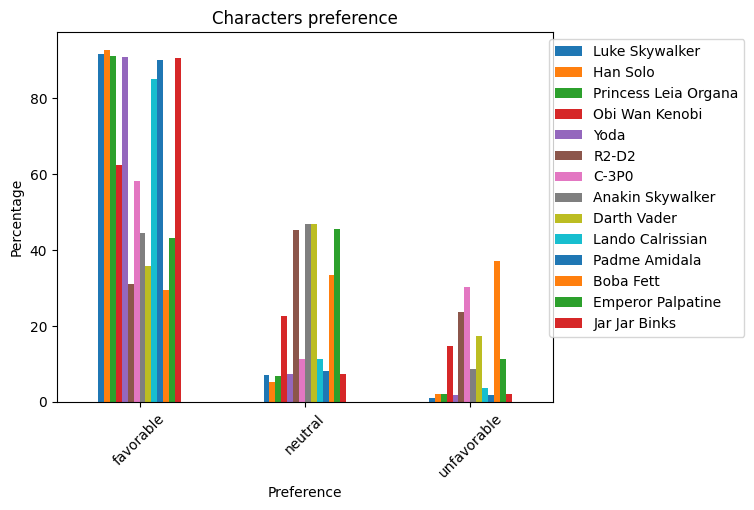

In [203]:
df_char.iloc[6:9,:].plot.bar()

# df_char.iloc[6:9,:].plot.bar(subplots=True, rot=0)
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.ylabel('Percentage')
plt.xlabel('Preference')

plt.title('Characters preference')
# plt.show()

The favorability is highest for `Han Solo`, and the most unfavorable character is `Boba Fett`.
Yet, `Boba Fett` might be a controversial character after all, more than  35% still finds the character favorable, while almost 40% finds the character unfavorable. however, more than 35% sill showed nutral preference for the character.